In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

figsize = (10,6)
pktPayloadSize = 1462 # Bytes

In [2]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r

In [3]:
simName = 'W5_load-50p'

In [4]:
msgStartEntryDict = {}
msgCompletionTimesDict = {}

with open("MsgTraces_"+simName+".tr",'r') as f:
    for line in f:
        msgLog = line.split()
        
        time = float(msgLog[1])*1e-9        # in seconds
        msgSize = int(msgLog[2])#//1462*1462 # in bytes
        sender = msgLog[3]                  # ip:port
        receiver = msgLog[4]                # ip:port
        txMsgId = int(msgLog[5])
        
        key = (sender, receiver, txMsgId)
        
        if (msgLog[0]=='+'):
            if (key in msgStartEntryDict):
                msgStartEntryDict[key].append(time)
            else:
                msgStartEntryDict[key] = [time]
                
        elif (msgLog[0] =='-'):
            if (key in msgStartEntryDict):
                startTime = msgStartEntryDict[key].pop()
                if (len(msgStartEntryDict[key]) <= 0):
                    msgStartEntryDict = removekey(msgStartEntryDict, key)
                    
                if (msgSize in msgCompletionTimesDict):
                    msgCompletionTimesDict[msgSize].append(time-startTime)
                else:
                    msgCompletionTimesDict[msgSize] = [time-startTime]
            else:
                print('ERROR: Start entry of message (' \
                      + sender + ' > ' + receiver + ', ' + str(txMsgId) \
                      + ') not found!')

ERROR: Start entry of message (10.0.69.1:1069 > 10.0.87.1:1087, 81) not found!
ERROR: Start entry of message (10.0.13.1:1013 > 10.0.104.1:1104, 87) not found!
ERROR: Start entry of message (10.0.13.1:1013 > 10.0.104.1:1104, 87) not found!


In [5]:
i = 0
for msgKey, msgStartTimes in msgStartEntryDict.items():
    print(msgKey, ' : ', msgStartTimes)
    i += len(msgStartTimes)
print ('Number of uncompleted messages: ' + str(i))

('10.0.134.1:1134', '10.0.9.1:1009', 43)  :  [3.191590129]
('10.0.116.1:1116', '10.0.141.1:1141', 63)  :  [3.2912227900000004]
('10.0.59.1:1059', '10.0.55.1:1055', 16)  :  [3.0423327770000004]
('10.0.45.1:1045', '10.0.48.1:1048', 15)  :  [3.065346629]
('10.0.60.1:1060', '10.0.57.1:1057', 30)  :  [3.0987958530000004]
('10.0.48.1:1048', '10.0.42.1:1042', 63)  :  [3.2483872600000003]
('10.0.79.1:1079', '10.0.105.1:1105', 6)  :  [3.014166237]
('10.0.89.1:1089', '10.0.7.1:1007', 76)  :  [3.375302645]
('10.0.5.1:1005', '10.0.88.1:1088', 15)  :  [3.0785935710000003]
('10.0.22.1:1022', '10.0.129.1:1129', 20)  :  [3.073478445]
('10.0.117.1:1117', '10.0.114.1:1114', 78)  :  [3.38042715]
('10.0.37.1:1037', '10.0.17.1:1017', 102)  :  [3.4778894940000002]
('10.0.54.1:1054', '10.0.60.1:1060', 47)  :  [3.1870663890000004]
('10.0.105.1:1105', '10.0.31.1:1031', 111)  :  [3.4364198060000004]
('10.0.115.1:1115', '10.0.31.1:1031', 85)  :  [3.4341355680000003]
('10.0.44.1:1044', '10.0.102.1:1102', 80)  :  

('10.0.34.1:1034', '10.0.2.1:1002', 73)  :  [3.256636813]
('10.0.50.1:1050', '10.0.104.1:1104', 28)  :  [3.1308311620000002]
('10.0.50.1:1050', '10.0.127.1:1127', 89)  :  [3.3753190820000003]
('10.0.114.1:1114', '10.0.124.1:1124', 18)  :  [3.087067244]
('10.0.94.1:1094', '10.0.55.1:1055', 55)  :  [3.201985259]
('10.0.66.1:1066', '10.0.52.1:1052', 18)  :  [3.0639006670000004]
('10.0.126.1:1126', '10.0.120.1:1120', 33)  :  [3.1691253240000004]
('10.0.125.1:1125', '10.0.71.1:1071', 4)  :  [3.0123767850000003]
('10.0.34.1:1034', '10.0.115.1:1115', 104)  :  [3.366962344]
('10.0.105.1:1105', '10.0.23.1:1023', 105)  :  [3.421430682]
('10.0.119.1:1119', '10.0.114.1:1114', 64)  :  [3.310390674]
('10.0.107.1:1107', '10.0.33.1:1033', 93)  :  [3.338714253]
('10.0.116.1:1116', '10.0.96.1:1096', 28)  :  [3.168528487]
('10.0.132.1:1132', '10.0.15.1:1015', 36)  :  [3.1484985290000003]
('10.0.97.1:1097', '10.0.119.1:1119', 91)  :  [3.342492934]
('10.0.117.1:1117', '10.0.77.1:1077', 63)  :  [3.306872912

('10.0.61.1:1061', '10.0.14.1:1014', 6)  :  [3.036918742]
('10.0.80.1:1080', '10.0.127.1:1127', 103)  :  [3.414371999]
('10.0.90.1:1090', '10.0.68.1:1068', 117)  :  [3.455944192]
('10.0.52.1:1052', '10.0.87.1:1087', 69)  :  [3.3165439890000004]
('10.0.139.1:1139', '10.0.86.1:1086', 98)  :  [3.419492679]
('10.0.118.1:1118', '10.0.29.1:1029', 93)  :  [3.389851642]
('10.0.105.1:1105', '10.0.102.1:1102', 4)  :  [3.019516169]
('10.0.47.1:1047', '10.0.34.1:1034', 16)  :  [3.072647953]
('10.0.49.1:1049', '10.0.80.1:1080', 46)  :  [3.212416709]
('10.0.24.1:1024', '10.0.61.1:1061', 92)  :  [3.3979956810000003]
('10.0.137.1:1137', '10.0.30.1:1030', 69)  :  [3.2687088970000002]
('10.0.100.1:1100', '10.0.29.1:1029', 56)  :  [3.1989707330000003]
('10.0.86.1:1086', '10.0.1.1:1001', 1)  :  [3.0040923900000003]
('10.0.100.1:1100', '10.0.127.1:1127', 70)  :  [3.2948625590000002]
('10.0.127.1:1127', '10.0.83.1:1083', 20)  :  [3.0773634490000004]
('10.0.29.1:1029', '10.0.130.1:1130', 103)  :  [3.48827514

In [6]:
print (json.dumps(msgCompletionTimesDict, sort_keys=True, indent=4))

{
    "1462": [
        2.901999999860294e-06,
        4.043000000120145e-06,
        2.901999999860294e-06,
        2.901999999860294e-06,
        4.362999999951711e-06,
        4.001999999836414e-06,
        4.001999999836414e-06,
        6.05899999994719e-06,
        4.002000000280503e-06,
        6.187999999962557e-06,
        6.453000000128384e-06,
        5.1479999996217884e-06,
        4.002000000280503e-06,
        5.2740000002771126e-06,
        6.486999999832932e-06,
        4.775999999928615e-06,
        6.198000000345871e-06,
        4.002000000280503e-06,
        4.882999999900051e-06,
        5.602999999965164e-06,
        5.245000000098088e-06,
        4.236999999740476e-06,
        6.361000000065786e-06,
        4.087999999846659e-06,
        5.6840000000057955e-06,
        4.103999999838237e-06,
        6.6659999999885144e-06,
        6.245999999876517e-06,
        4.001999999836414e-06,
        2.9020000003043833e-06,
        4.165000000000418e-06,
        4.209000000

In [7]:
print('Number of distinct message sizes: ' + str(len(msgCompletionTimesDict)))

cntMultMeasures = 0
numMsgs = 0
nonFullPacketMsgSizes = []
for msgSize, msgCompletionTimes in msgCompletionTimesDict.items():
    
    if (len(msgCompletionTimes)>1):
        cntMultMeasures += 1
    
    numMsgs += len(msgCompletionTimes)
    
    if (msgSize%pktPayloadSize != 0):
        nonFullPacketMsgSizes.append((msgSize,msgSize%pktPayloadSize))
    
print('Number of distinct message sizes that '\
      +'have multiple measurements: ' + str(cntMultMeasures))   
print('Number of distinct messages: ' + str(numMsgs)) 

if (nonFullPacketMsgSizes):
    print('Non-Full Packet Message Sizes: ', nonFullPacketMsgSizes)

Number of distinct message sizes: 396
Number of distinct message sizes that have multiple measurements: 380
Number of distinct messages: 15121


In [8]:
msgSizes = []
p50CompletionTimes = []
p99CompletionTimes = []
baseCompletionTimes = []
p50SlowDowns = []
p99SlowDowns = []

for msgSize, msgCompletionTimes in msgCompletionTimesDict.items():
    
    msgSizes.append(msgSize)
    
    times = np.array(msgCompletionTimes)
    p50CompletionTime = np.percentile(times,50)
    p50CompletionTimes.append(p50CompletionTime)
    p99CompletionTime = np.percentile(times,99)
    p99CompletionTimes.append(p99CompletionTime)
    
    baseCompletionTime = (msgSize+pktPayloadSize)*8.0/10e9 + 0.5e-6
    baseCompletionTimes.append(baseCompletionTime)
    
    p50SlowDowns.append(p50CompletionTime / baseCompletionTime)
    p99SlowDowns.append(p99CompletionTime / baseCompletionTime)
    
zipData = sorted(zip(msgSizes,
                     p50CompletionTimes,
                     p99CompletionTimes,
                     baseCompletionTimes,
                     p50SlowDowns,
                     p99SlowDowns))
    
msgSizes = np.array([x for x,_,_,_,_,_ in zipData])
p50CompletionTimes = np.array([x for _,x,_,_,_,_ in zipData])
p99CompletionTimes = np.array([x for _,_,x,_,_,_ in zipData])
baseCompletionTimes = np.array([x for _,_,_,x,_,_ in zipData])
p50SlowDowns = np.array([x for _,_,_,_,x,_ in zipData])
p99SlowDowns = np.array([x for _,_,_,_,_,x in zipData])

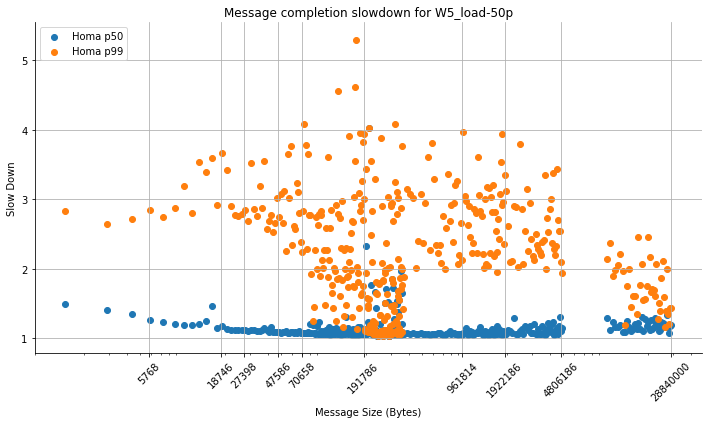

In [9]:
plt.figure(figsize=figsize)
plt.grid()

plt.scatter(msgSizes,p50SlowDowns,label='Homa p50')
plt.scatter(msgSizes,p99SlowDowns,label='Homa p99')

plt.ylabel('Slow Down')
plt.xlabel('Message Size (Bytes)')
plt.title('Message completion slowdown for '+simName)
plt.legend(loc='upper left')

# plt.ylim([1,15])
# plt.yscale('log')
# yticks = [1,2,3,4,15]
# plt.yticks(yticks, yticks)
plt.xscale('log')
xticks = [5768,18746,27398,47586,70658,191786,961814,1922186,4806186,28840000]
plt.xticks(xticks, xticks, rotation=45)

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tight_layout()

plt.savefig('MsgComletionSlowdown_'+simName+'.png')
plt.show()